In [1]:
#importamos las librerias
import numpy as num
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfTrain = pd.read_csv("housing_train.csv")
condicion = [
    (dfTrain['SalePrice']<= 100000),
    (dfTrain['SalePrice']> 100000) & (dfTrain['SalePrice']<= 500000),
    (dfTrain['SalePrice']> 500000)
]
valor = ['Pbajo','Pmedio','Palto']
dfTrain['catPrecio'] = np.select(condicion,valor)
dfTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,catPrecio
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Pmedio
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Pmedio
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Pmedio
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Pmedio
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Pmedio


In [3]:
dfFilter1 = dfTrain[["LotConfig","BldgType","OverallCond",
                    "Exterior1st","SalePrice","LotFrontage",'catPrecio']]

In [4]:
obj = (dfFilter1.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Variables Categoricas:",len(object_cols))
 
int_ = (dfFilter1.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("variables Enteras:",len(num_cols))
 
fl = (dfFilter1.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Variables Flotantes:",len(fl_cols))

Variables Categoricas: 4
variables Enteras: 2
Variables Flotantes: 1


<AxesSubplot:>

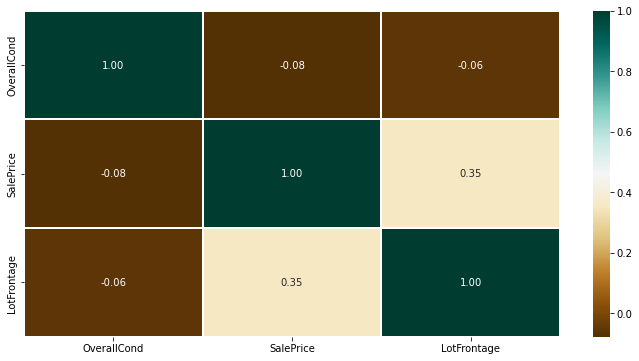

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(dfFilter1.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<AxesSubplot:title={'center':'No. de valores unicos de las variables categoricas'}>

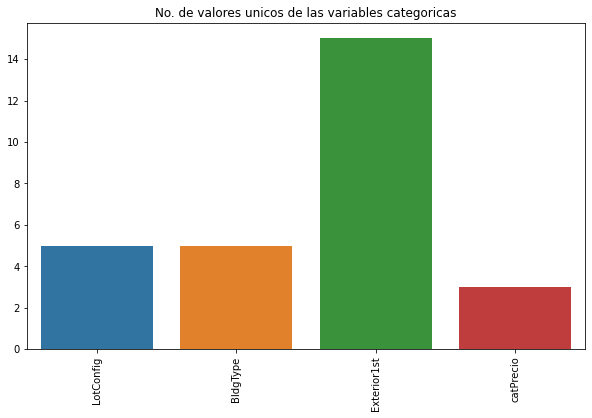

In [6]:
unique_values = []
for col in object_cols:
  unique_values.append(dfFilter1[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. de valores unicos de las variables categoricas')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

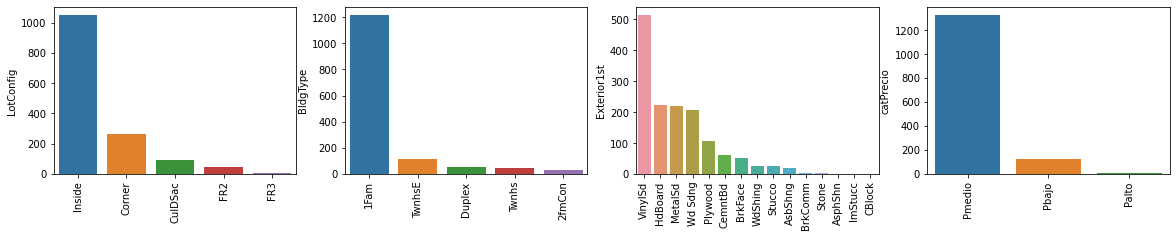

In [7]:
plt.figure(figsize=(20, 40))
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = dfFilter1[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [8]:
dfFilter1['LotFrontage'] = dfFilter1['LotFrontage'].fillna(
dfFilter1['LotFrontage'].mean())

C:\Users\jcarl\AppData\Local\Temp\ipykernel_32732\1333787699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilter1['LotFrontage'] = dfFilter1['LotFrontage'].fillna(


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfFilter1['catPrecioLabel'] = le.fit_transform(dfFilter1['catPrecio'])

C:\Users\jcarl\AppData\Local\Temp\ipykernel_32732\3335306827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilter1['catPrecioLabel'] = le.fit_transform(dfFilter1['catPrecio'])


In [10]:
dfFilter1.head()

,LotConfig,BldgType,OverallCond,Exterior1st,SalePrice,LotFrontage,catPrecio,catPrecioLabel
0,Inside,1Fam,5,VinylSd,208500,65.0,Pmedio,2
1,FR2,1Fam,8,MetalSd,181500,80.0,Pmedio,2
2,Inside,1Fam,5,VinylSd,223500,68.0,Pmedio,2
3,Corner,1Fam,5,Wd Sdng,140000,60.0,Pmedio,2
4,FR2,1Fam,5,VinylSd,250000,84.0,Pmedio,2


In [11]:
dfFilter1['catPrecioLabel'].value_counts()

2    1328
1     123
0       9
Name: catPrecioLabel, dtype: int64

In [12]:
df=dfFilter1[['OverallCond','catPrecioLabel','LotFrontage','SalePrice']]
X = df.drop(columns='catPrecioLabel')
y = df.catPrecioLabel

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)


In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10,criterion='gini')
modelo1 = tree.fit(X_train,y_train)

In [15]:
y_pred=modelo1.predict(X_test)
y_trainOut=modelo1.predict(X_train)

In [16]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, y_trainOut))
print(f'puntuación del modelo en los datos de entrenamiento: {modelo1.score(X_train, y_train)}')
print(f'puntuación del modelo en los datos de testing: {modelo1.score(X_test, y_test)}')

Accuracy: 1.0
puntuación del modelo en los datos de entrenamiento: 1.0
puntuación del modelo en los datos de testing: 1.0


In [17]:
y_pred2 = modelo1.predict(X)
df['Prediccion del precio'] = y_pred2
df.sample(10)[['SalePrice','Prediccion del precio']]

C:\Users\jcarl\AppData\Local\Temp\ipykernel_32732\3720751033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediccion del precio'] = y_pred2


,SalePrice,Prediccion del precio
105,250000,2
403,258000,2
405,150000,2
235,89500,1
1367,127000,2
626,139900,2
497,184000,2
654,350000,2
1282,150500,2
1115,318000,2


In [18]:
cm=metrics.confusion_matrix(y_test,modelo1.predict(X_test))
print(cm)

[[  3   0   0]
 [  0  27   0]
 [  0   0 335]]


Matriz de confusión sin normalizar
[[  3   0   0]
 [  0  27   0]
 [  0   0 335]]
Matriz de confusión normalizada
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


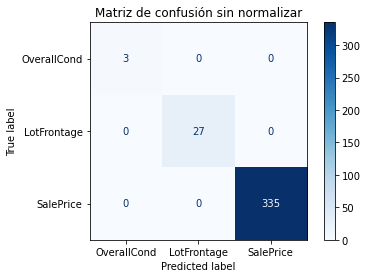

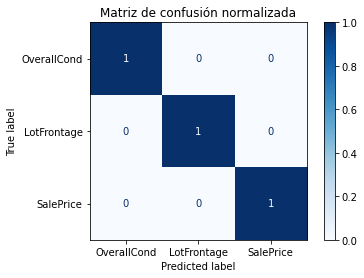

In [19]:
classifier = svm.SVC(kernel="linear", C=0.02).fit(X_train, y_train)

num.set_printoptions(precision=2)

title_options = [
    ("Matriz de confusión sin normalizar", None),
    ("Matriz de confusión normalizada", "true"),
]
for title, normalize in title_options:
    display = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=dfFilter1[['OverallCond','LotFrontage','SalePrice']],
        cmap=plot.cm.Blues,
        normalize=normalize,
    )
    display.ax_.set_title(title)

    print(title)
    print(display.confusion_matrix)

plot.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators = 100,
                              criterion = 'gini',
                              max_features = True,
                              max_samples = 1/10,
                              oob_score=True)

modelo2 = forest.fit(X_train,y_train)
y_pred2=modelo1.predict(X_test)
y_trainOut2=modelo1.predict(X_train)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_train, y_trainOut2))
print(f'puntuación del modelo en los datos de entrenamiento: {modelo2.score(X_train, y_train)}')
print(f'puntuación del modelo en los datos de testing: {modelo2.score(X_test, y_test)}')

Accuracy: 1.0
puntuación del modelo en los datos de entrenamiento: 0.9945205479452055
puntuación del modelo en los datos de testing: 0.9917808219178083


In [23]:
#mostrar arboles
"""for arbol in forest.estimators_:
    tree.plot_tree(arbol,feature_names = df_final.columns[:-1])
    plt.show()"""

'for arbol in forest.estimators_:\n    tree.plot_tree(arbol,feature_names = df_final.columns[:-1])\n    plt.show()'

In [24]:
cm=metrics.confusion_matrix(y_test,y_pred2)
print(cm)

[[  3   0   0]
 [  0  27   0]
 [  0   0 335]]
